In [1]:
'''
Herbaceous expt
JBoudell_CO2BiomassSeed_Corrected has the germination columns removed, the green highlighted headers are the # of transplants (w/ leaves and without), 
we can remove the SIIR for failure to participate
no germination data sheet yet b/c I want to organize it for the glmm

https://www.statsmodels.org/dev/examples/notebooks/generated/mixed_lm_example.html
'''

'\nHerbaceous expt\nJBoudell_CO2BiomassSeed_Corrected has the germination columns removed, the green highlighted headers are the # of transplants (w/ leaves and without), \nwe can remove the SIIR for failure to participate\nno germination data sheet yet b/c I want to organize it for the glmm\n\nhttps://www.statsmodels.org/dev/examples/notebooks/generated/mixed_lm_example.html\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import eda_model_funcs as emf
import statsmodels

sn.set_theme(style='darkgrid')

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dfht = pd.read_csv('herb_transplants_raw.csv')
dfht.columns = ['pot','species','co2_lvl','water_lvl','ag_biomass','bg_biomass','rep_biomass','flowers_num','fruit_num','transplanted_w_leaf','transplanted_w_radicle','comment']

In [4]:
dfht.head()

,pot,species,co2_lvl,water_lvl,ag_biomass,bg_biomass,rep_biomass,flowers_num,fruit_num,transplanted_w_leaf,transplanted_w_radicle,comment
0,19,MIGU,Ambient,Fluct,0.1255,0.0683,0.0789,10.0,NaN,8,0,NaN
1,42,MIGU,Ambient,Fluct,0.0349,0.0177,0.0568,3.0,6.0,10,0,NaN
2,53,MIGU,Ambient,Fluct,0.0556,0.0432,0.0312,7.0,NaN,1,0,NaN
3,105,MIGU,Ambient,Fluct,0.1489,0.1361,0.0970,12.0,NaN,10,0,NaN
4,140,MIGU,Ambient,Fluct,0.1629,0.1291,0.1041,2.0,12.0,8,0,NaN


In [5]:
# dfht.describe()

In [6]:
dfht.isna().sum()

pot                         0
species                     0
co2_lvl                     0
water_lvl                   0
ag_biomass                 47
bg_biomass                 47
rep_biomass               121
flowers_num               122
fruit_num                 143
transplanted_w_leaf         0
transplanted_w_radicle      0
comment                   126
dtype: int64

In [7]:
spec = dfht.species.unique()
print(spec)
for sp in spec:
    print('Species:', sp)
    print(dfht[dfht.species == sp].isna().sum())
    print('----------')

['MIGU' 'NAOF' 'POMO' 'SIIR' 'VEAN']
Species: MIGU
pot                        0
species                    0
co2_lvl                    0
water_lvl                  0
ag_biomass                 9
bg_biomass                 9
rep_biomass               14
flowers_num               16
fruit_num                 31
transplanted_w_leaf        0
transplanted_w_radicle     0
comment                   26
dtype: int64
----------
Species: NAOF
pot                        0
species                    0
co2_lvl                    0
water_lvl                  0
ag_biomass                 2
bg_biomass                 2
rep_biomass                3
flowers_num                2
fruit_num                  4
transplanted_w_leaf        0
transplanted_w_radicle     0
comment                   33
dtype: int64
----------
Species: POMO
pot                        0
species                    0
co2_lvl                    0
water_lvl                  0
ag_biomass                 0
bg_biomass                 0
rep

In [8]:
dfht = dfht[dfht.species != 'SIIR']
species_nm = dfht.species.unique()
print(species_nm)

['MIGU' 'NAOF' 'POMO' 'VEAN']


In [9]:
dfht.dtypes

pot                         int64
species                    object
co2_lvl                    object
water_lvl                  object
ag_biomass                float64
bg_biomass                float64
rep_biomass               float64
flowers_num               float64
fruit_num                 float64
transplanted_w_leaf         int64
transplanted_w_radicle      int64
comment                    object
dtype: object

In [10]:
#Feature Engineering
dfht['total_cnt'] = dfht.transplanted_w_leaf + dfht.transplanted_w_radicle
dfht['ag_biomass_m'] = dfht.ag_biomass/dfht.total_cnt
dfht['total_biomass'] = dfht.ag_biomass + dfht.bg_biomass
# dfht['log_tbiomass'] = np.log(dfht.total_biomass)

<AxesSubplot:>

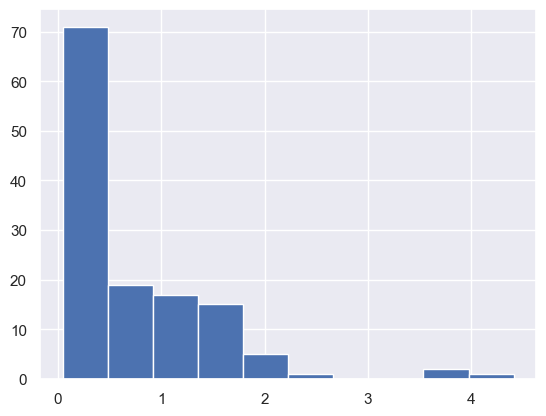

In [11]:
dfht.total_biomass.hist(bins=10)

In [12]:
# np.log(dfht.total_biomass).hist(bins=10)

<AxesSubplot:xlabel='species', ylabel='total_biomass'>

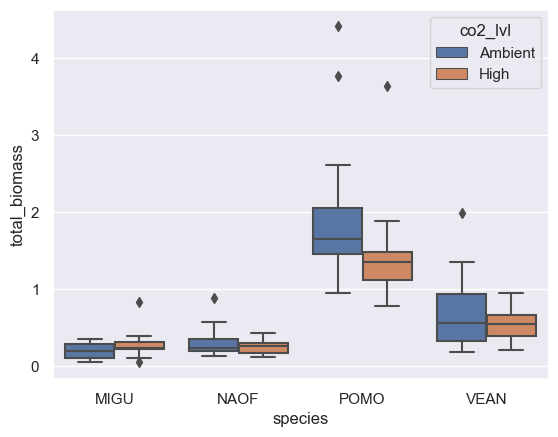

In [13]:
sn.boxplot(data=dfht, x='species', y='total_biomass', hue='co2_lvl')

<AxesSubplot:xlabel='water_lvl', ylabel='total_biomass'>

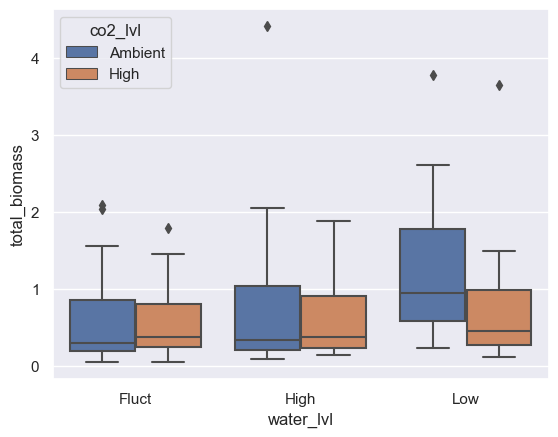

In [14]:
sn.boxplot(data=dfht, x='water_lvl', y='total_biomass', hue='co2_lvl')

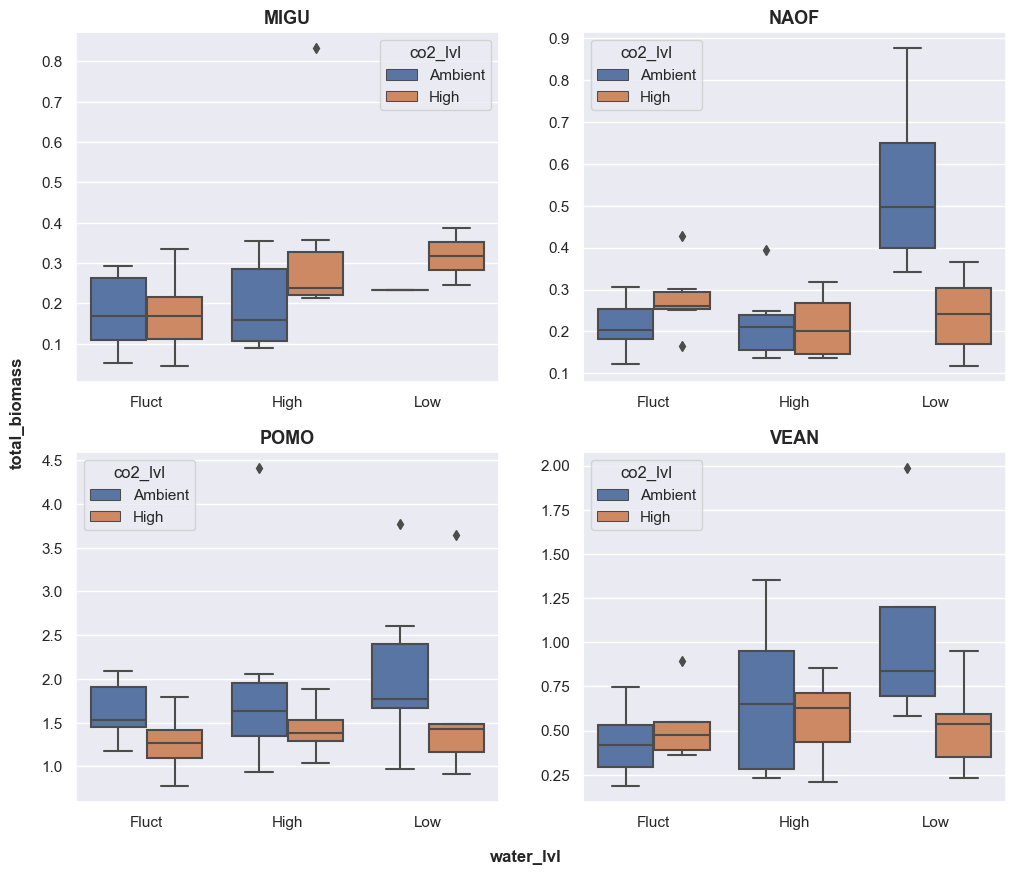

In [15]:
emf.plot_multiple_boxplots(dfht, by = 'species', x = 'water_lvl', y = 'total_biomass', 
                           hue = 'co2_lvl', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)})

# emf.plot_multiple_boxplots(dfht, by = 'species', x = 'water_lvl', y = 'log_tbiomass', 
#                            hue = 'co2_lvl', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)})

<AxesSubplot:xlabel='water_lvl', ylabel='total_biomass'>

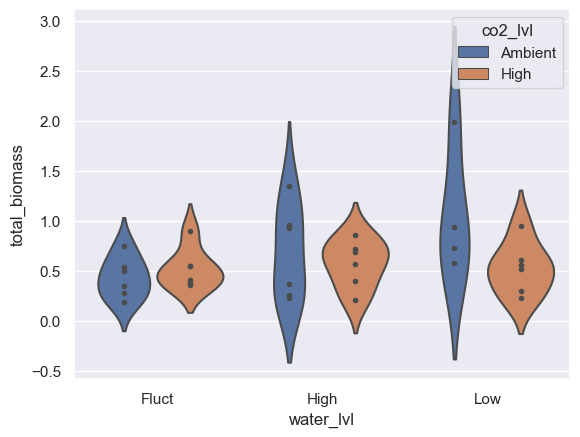

In [16]:
sn.violinplot(data=dfht[dfht.species=='VEAN'], x='water_lvl', y='total_biomass', 
              hue='co2_lvl', split=False, inner='point', gap=0.05)

In [35]:
# emf.plot_sidebyside_boxplots(dfht, by = 'species', x = 'water_lvl', y1 = 'ag_biomass', y2 = 'bg_biomass', hue = 'co2_lvl')

In [19]:
#*** Should I rescale each species biomass to 0-1, 

df = dfht.copy()
# df = df[df.species != 'MIGU']
df = df[df.co2_lvl.isna()==False]
df = df[df.total_biomass.isna()==False]

# df['co2_lvl'] = np.where(df.co2_lvl=='Ambient',0,1)
# df['water_lvl'] = np.select([df.water_lvl=='Low', df.water_lvl=='Fluct', df.water_lvl=='High'], [2,0,1])
# df['species'] = np.select([df.species=='MIGU', df.species=='NAOF', df.species=='VEAN', df.species=='POMO'], [0,1,2,3])
df = df.drop(columns=['comment'])
df['co2_lvl'] = np.where(df['co2_lvl'] == 'High', 1, 0)
df['water_low'] = np.where(df['water_lvl'] == 'Low', 1, 0)
df['water_fluct'] = np.where(df['water_lvl'] == 'Fluct', 1, 0)
df['water_high'] = np.where(df['water_lvl'] == 'High', 1, 0)

df.loc[(df['co2_lvl']==0) & (df['water_fluct']==1), 'treatment'] = 'CO2Amb_WA'
df.loc[(df['co2_lvl']==0) & (df['water_low']==1), 'treatment'] = 'CO2Amb_WL'
df.loc[(df['co2_lvl']==0) & (df['water_high']==1), 'treatment'] = 'CO2Amb_WH'
df.loc[(df['co2_lvl']==1) & (df['water_fluct']==1), 'treatment'] = 'CO2High_WA'
df.loc[(df['co2_lvl']==1) & (df['water_low']==1), 'treatment'] = 'CO2High_WL'
df.loc[(df['co2_lvl']==1) & (df['water_high']==1), 'treatment'] = 'CO2High_WH'


df.to_csv('herb_transplabnts_model_rdy.csv')

In [18]:
df.treatment.value_counts()

CO2Amb_WA     24
CO2Amb_WH     24
CO2High_WA    24
CO2High_WH    24
CO2High_WL    20
CO2Amb_WL     15
Name: treatment, dtype: int64

In [30]:
import statsmodels.formula.api as smf

model = smf.ols('total_biomass ~ co2_lvl', df)
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_biomass   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.981
Date:                Sun, 29 Oct 2023   Prob (F-statistic):              0.162
Time:                        12:17:50   Log-Likelihood:                -147.96
No. Observations:                 131   AIC:                             299.9
Df Residuals:                     129   BIC:                             305.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8333      0.095      8.767      0.0

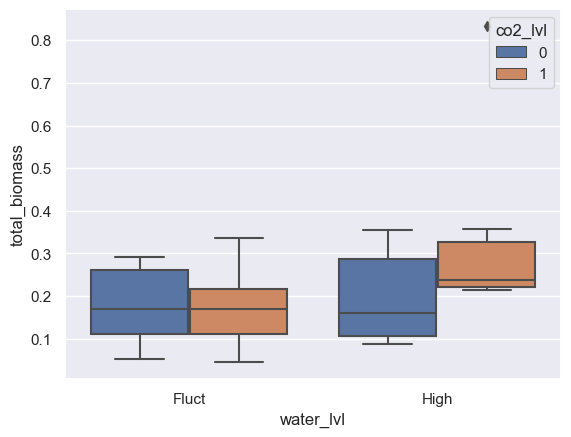

                            OLS Regression Results                            
Dep. Variable:          total_biomass   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1.827
Date:                Sun, 29 Oct 2023   Prob (F-statistic):              0.175
Time:                        12:17:51   Log-Likelihood:                 13.352
No. Observations:                  24   AIC:                            -18.70
Df Residuals:                      20   BIC:                            -13.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1250    

In [31]:
migu = df[df.species=='MIGU']
migu = migu[migu.water_lvl != 'Low']

sn.boxplot(data=migu, x='water_lvl', y='total_biomass', hue='co2_lvl')
plt.show()

model = smf.ols('total_biomass ~ co2_lvl + co2_lvl * water_high + co2_lvl * water_fluct', migu)
res = model.fit()

print(res.summary())

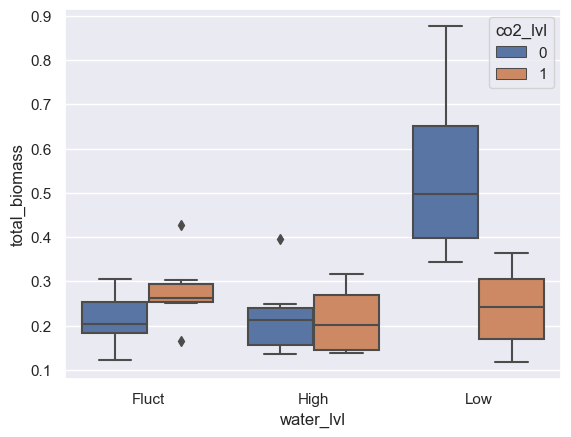

                            OLS Regression Results                            
Dep. Variable:          total_biomass   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     6.130
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           0.000591
Time:                        12:17:51   Log-Likelihood:                 29.769
No. Observations:                  34   AIC:                            -47.54
Df Residuals:                      28   BIC:                            -38.38
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2474    

In [32]:
naof = df[df.species=='NAOF']

sn.boxplot(data=naof, x='water_lvl', y='total_biomass', hue='co2_lvl')
plt.show()

model = smf.ols('total_biomass ~ co2_lvl + co2_lvl * water_low + co2_lvl * water_high + co2_lvl * water_fluct', naof)
res = model.fit()

print(res.summary())

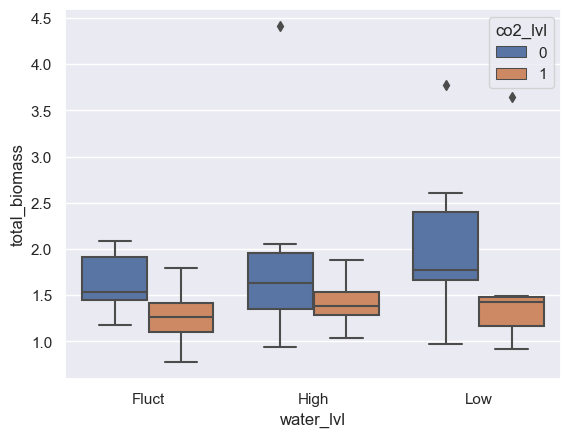

                            OLS Regression Results                            
Dep. Variable:          total_biomass   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9431
Date:                Sun, 29 Oct 2023   Prob (F-statistic):              0.468
Time:                        12:17:51   Log-Likelihood:                -39.687
No. Observations:                  36   AIC:                             91.37
Df Residuals:                      30   BIC:                             100.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4271    

In [33]:
pomo = df[df.species=='POMO']

sn.boxplot(data=pomo, x='water_lvl', y='total_biomass', hue='co2_lvl')
plt.show()

model = smf.ols('total_biomass ~ co2_lvl + co2_lvl*water_low + co2_lvl*water_high + co2_lvl*water_fluct', pomo)
res = model.fit()

print(res.summary())

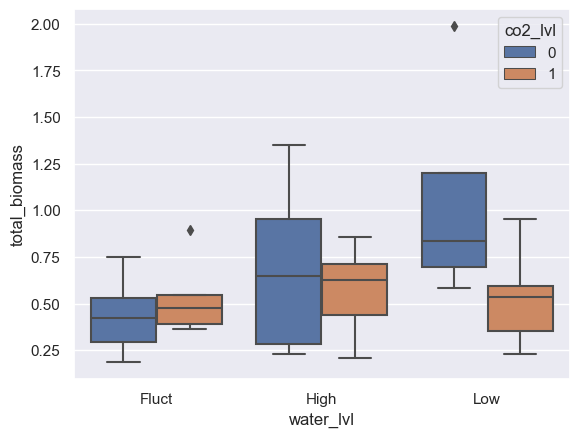

                            OLS Regression Results                            
Dep. Variable:          total_biomass   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1.910
Date:                Sun, 29 Oct 2023   Prob (F-statistic):              0.124
Time:                        12:17:52   Log-Likelihood:                -8.5487
No. Observations:                  34   AIC:                             29.10
Df Residuals:                      28   BIC:                             38.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5439    

In [34]:
vean = df[df.species=='VEAN']

sn.boxplot(data=vean, x='water_lvl', y='total_biomass', hue='co2_lvl')
plt.show()

model = smf.ols('total_biomass ~ co2_lvl + co2_lvl*water_low + co2_lvl*water_high + co2_lvl*water_fluct', vean)
res = model.fit()

print(res.summary())